In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv(r'..\house-prices-advanced-regression-techniques\train.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [471]:
na = df.isnull().mean().sort_values(ascending=False)
na.head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

In [472]:
new_df = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Id'],axis=1)
na = new_df.isnull().mean().sort_values(ascending=False)
na_list = list(na.head(14).index)
list(na.head(14).index)

['LotFrontage',
 'GarageType',
 'GarageYrBlt',
 'GarageCond',
 'GarageQual',
 'GarageFinish',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [473]:
new_df['LotFrontage'].fillna(new_df['LotFrontage'].mean(),inplace=True)
new_df['GarageFinish'].fillna(new_df['GarageFinish'].mode()[0],inplace=True)
new_df['GarageType'].fillna(new_df['GarageType'].mode()[0],inplace=True)
new_df['GarageCond'].fillna(new_df['GarageCond'].mode()[0],inplace=True)
new_df['GarageQual'].fillna(new_df['GarageQual'].mode()[0],inplace=True)
new_df['BsmtExposure'].fillna(new_df['BsmtExposure'].mode()[0],inplace=True)
new_df['BsmtFinType2'].fillna(new_df['BsmtFinType2'].mode()[0],inplace=True)
new_df['BsmtCond'].fillna(new_df['BsmtCond'].mode()[0],inplace=True)
new_df['BsmtQual'].fillna(new_df['BsmtQual'].mode()[0],inplace=True)
new_df['MasVnrType'].fillna(new_df['MasVnrType'].mode()[0],inplace=True)
new_df['Electrical'].fillna(new_df['Electrical'].mode()[0],inplace=True)
new_df['BsmtFinType1'].fillna(new_df['BsmtFinType1'].mode()[0],inplace=True)
new_df['BsmtFinType1'].fillna(new_df['BsmtFinType1'].mode()[0],inplace=True)
new_df['GarageYrBlt'].fillna(new_df['GarageYrBlt'].mode()[0],inplace=True)
new_df['MasVnrArea'].fillna(new_df['MasVnrArea'].mean(),inplace=True)
new_df.isna().mean().sort_values(ascending=False).head(10)

SalePrice       0.0
YearRemodAdd    0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
dtype: float64

In [474]:
detection = new_df.columns

In [475]:
def zeros_value(data):
    count = 0
    for i in list(new_df[str(data)]):
        if i ==0:
            count+= 1
    return count/1460*100
zero_score = []
for i in detection:
    if zeros_value(str(i)) > 40:
        print(zeros_value(str(i)),str(i)) 
        zero_score.append(str(i))       

58.972602739726035 MasVnrArea
88.56164383561645 BsmtFinSF2
56.780821917808225 2ndFlrSF
98.21917808219179 LowQualFinSF
58.63013698630137 BsmtFullBath
94.3835616438356 BsmtHalfBath
62.534246575342465 HalfBath
47.26027397260274 Fireplaces
52.12328767123287 WoodDeckSF
44.93150684931507 OpenPorchSF
85.75342465753425 EnclosedPorch
98.35616438356163 3SsnPorch
92.05479452054794 ScreenPorch
99.52054794520548 PoolArea
96.43835616438356 MiscVal


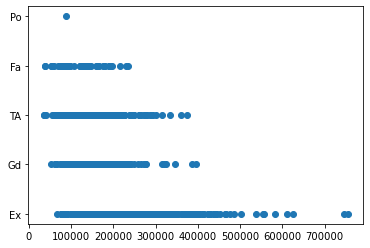

In [505]:
var = 'HeatingQC'
plt.scatter(df['SalePrice'],df[str(var)])

In [477]:
#Deleting values containing mainy zeroes
new_df1 = new_df.copy().drop('SalePrice',axis=1)
new_df1 = new_df1.drop(['LowQualFinSF','MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','LowQualFinSF','BsmtFinSF2'],axis=1)

new_df1 = new_df1.drop(['WoodDeckSF','OpenPorchSF','HalfBath','BsmtUnfSF','Street','Utilities'],axis=1)

In [478]:
from scipy.stats import zscore

detection = new_df1.columns

def outliers_detection(data):
    count = 0
    for i in np.abs(zscore(new_df1[str(data)])):
        if np.abs(i) > 3:
            count+= 1
    return count*(100)/1460

detection = new_df1.select_dtypes(exclude='object').columns
list(detection)
outlier = []
outlier_values = []
for i in detection:
    print(str(i)+':'+str(outliers_detection(str(i))))
    outlier.append(i)
    outlier_values.append(outliers_detection(str(i)))    

MSSubClass:2.0547945205479454
LotFrontage:1.095890410958904
LotArea:0.8904109589041096
OverallQual:0.136986301369863
OverallCond:1.917808219178082
YearBuilt:0.410958904109589
YearRemodAdd:0.0
MasVnrArea:2.191780821917808
BsmtFinSF1:0.410958904109589
TotalBsmtSF:0.684931506849315
1stFlrSF:0.821917808219178
2ndFlrSF:0.273972602739726
GrLivArea:1.095890410958904
BsmtFullBath:1.095890410958904
BsmtHalfBath:5.616438356164384
FullBath:0.0
BedroomAbvGr:0.958904109589041
KitchenAbvGr:4.657534246575342
TotRmsAbvGrd:0.821917808219178
Fireplaces:0.3424657534246575
GarageYrBlt:0.0684931506849315
GarageCars:0.0
GarageArea:0.4794520547945205
MoSold:0.0
YrSold:0.0


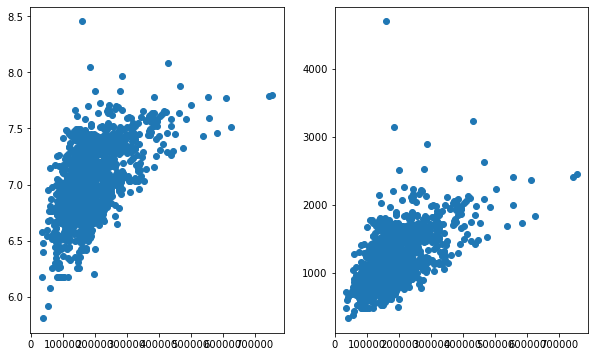

In [479]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
var = '1stFlrSF'
mean = new_df[str(var)].replace(0,new_df[str(var)].mean())
ax[0].scatter(new_df['SalePrice'],np.log(mean))
ax[1].scatter(new_df['SalePrice'],new_df[str(var)] )

In [480]:
test_dataset = pd.read_csv('test_dataset.csv')
test_dataset

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1455,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [481]:
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
Scaler = RobustScaler()
Standardization = pd.DataFrame(Scaler.fit_transform(new_df1.select_dtypes(exclude =['object'])),columns =new_df1.select_dtypes(exclude =['object']).columns )
Standardization

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,...,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold
0,0.2,-0.265787,-0.254076,0.5,0.0,0.652174,0.243243,1.193303,0.452790,-0.269652,...,0.0,0.0,0.0,1.0,-1.0,0.451220,0.0,0.281573,-1.333333,0.0
1,-0.6,0.523686,0.030015,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,0.538308,...,0.0,0.0,0.0,0.0,0.0,-0.207317,0.0,-0.082816,-0.333333,-0.5
2,0.2,-0.107893,0.437624,0.5,0.0,0.608696,0.216216,0.986301,0.143910,-0.142289,...,0.0,0.0,0.0,0.0,0.0,0.402439,0.0,0.530021,1.000000,0.0
3,0.4,-0.528945,0.017663,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,-0.468657,...,-1.0,0.0,0.0,0.5,0.0,0.329268,1.0,0.670807,-1.333333,-1.0
4,0.2,0.734213,1.181201,1.0,0.0,0.586957,0.162162,2.130898,0.381186,0.305473,...,0.0,1.0,0.0,1.5,0.0,0.378049,1.0,1.474120,2.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.2,-0.423682,-0.385746,0.0,0.0,0.565217,0.162162,0.000000,-0.538435,-0.076617,...,0.0,0.0,0.0,0.5,0.0,0.353659,0.0,-0.082816,0.666667,-0.5
1456,-0.6,0.786844,0.913167,0.0,1.0,0.108696,-0.162162,0.724505,0.570727,1.095522,...,0.0,0.0,0.0,0.5,1.0,-0.158537,0.0,0.082816,-1.333333,1.0
1457,0.4,-0.213156,-0.107831,0.5,4.0,-0.695652,0.324324,0.000000,-0.152334,0.319403,...,0.0,1.0,0.0,1.5,1.0,-1.060976,-1.0,-0.944099,-0.333333,1.0
1458,-0.6,-0.107893,0.058918,-0.5,1.0,-0.500000,0.054054,0.000000,-0.469638,0.172139,...,-1.0,-1.0,0.0,-0.5,-1.0,-0.841463,-1.0,-0.993789,-0.666667,1.0


In [482]:
label = pd.concat([new_df1.select_dtypes('object'),test_dataset],axis=0)
label

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1455,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [483]:
Label = pd.get_dummies(label,drop_first = True)
X_label = Label.iloc[:1460,:]
Test_label = Label.iloc[1460:,:]
X_label.shape,Test_label.shape

((1460, 194), (1459, 194))

In [484]:
Test_label.to_csv('Train_label.csv',index=False)

In [485]:
(Test_label.columns == X_label.columns).all()

True

In [486]:
detection = list(X_label.columns)

In [487]:
dataset = pd.concat([Standardization,X_label],axis=1)
dataset

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.2,-0.265787,-0.254076,0.5,0.0,0.652174,0.243243,1.193303,0.452790,-0.269652,...,0,0,0,0,1,0,0,0,1,0
1,-0.6,0.523686,0.030015,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,0.538308,...,0,0,0,0,1,0,0,0,1,0
2,0.2,-0.107893,0.437624,0.5,0.0,0.608696,0.216216,0.986301,0.143910,-0.142289,...,0,0,0,0,1,0,0,0,1,0
3,0.4,-0.528945,0.017663,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,-0.468657,...,0,0,0,0,1,0,0,0,0,0
4,0.2,0.734213,1.181201,1.0,0.0,0.586957,0.162162,2.130898,0.381186,0.305473,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.2,-0.423682,-0.385746,0.0,0.0,0.565217,0.162162,0.000000,-0.538435,-0.076617,...,0,0,0,0,1,0,0,0,1,0
1456,-0.6,0.786844,0.913167,0.0,1.0,0.108696,-0.162162,0.724505,0.570727,1.095522,...,0,0,0,0,1,0,0,0,1,0
1457,0.4,-0.213156,-0.107831,0.5,4.0,-0.695652,0.324324,0.000000,-0.152334,0.319403,...,0,0,0,0,1,0,0,0,1,0
1458,-0.6,-0.107893,0.058918,-0.5,1.0,-0.500000,0.054054,0.000000,-0.469638,0.172139,...,0,0,0,0,1,0,0,0,1,0


In [488]:
X = dataset.values
Y = df['SalePrice'].values

In [820]:
import random
random.seed(30)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=3)
X_train.shape,y_train.shape

((876, 219), (876,))

In [813]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error,make_scorer,r2_score
import xgboost as xgb
Rn = RandomForestRegressor(random_state=3)
Xg = xgb.XGBRegressor(random_state=3)

In [384]:
from sklearn.model_selection import RandomizedSearchCV

In [283]:
# Number of trees in random forest

# Number of features to consider at every split
#max_features = ['auto', 'sqrt',0.2,0.5]
# Maximum number of levels in tree

# max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 1)]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [ 1, 2, 5, 10, 15, 20, 30, 40, 50]
# Method of selecting samples for training each tree
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 15)]
max_depth = [int(x) for x in np.linspace(5, 30, num = 2)]
learning_rate= [0.01,0.03,0.05,0.07,0.09,0.1]
colsample_bytree = [0.1,0.2,0.3,0.4,0.5]
subsample = [0.6,0.7,0.8,0.9,1]
reg_lambda= [2,3,4,5,6,7,8,9,10,11,12]
param = {      'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'colsample_bytree' : colsample_bytree,
                'subsample': subsample,
                'reg_lambda':reg_lambda
        }

clf = RandomizedSearchCV(Xg,param,cv=10,n_iter=5,random_state=2)

In [284]:
search = clf.fit(X_train,y_train)

In [285]:
search.best_params_

{'subsample': 0.6,
 'reg_lambda': 8,
 'n_estimators': 1457,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 0.4}

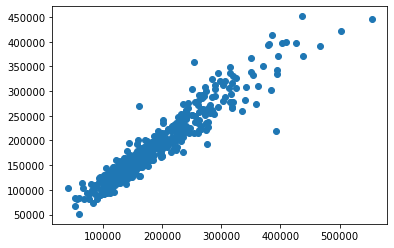

In [839]:
#Rns = RandomForestRegressor(n_estimators=1500,min_samples_split=2,min_samples_leaf=5,max_features=0.2,max_depth=30,bootstrap = False,random_state=3)

Xg = xgb.XGBRegressor(n_estimators=1500,max_depth=15,learning_rate=0.004,subsample =0.7,colsample_bytree=0.3,reg_lambda=8,reg_alpha=15,random_state=2)

Xg.fit(X_train,y_train)

y_pred = Xg.predict(X_test)
y_pred2 = Xg.predict(X_train)

plt.scatter(y_test,y_pred)

In [840]:
mean_squared_log_error(y_test,y_pred),mean_squared_log_error(y_train,y_pred2)

(0.014558593445049924, 0.0029344091832908706)

In [841]:
r2_score(y_test,y_pred),r2_score(y_train,y_pred2)

(0.9080233638975591, 0.9694258269220472)

import pickle
filename = '.\Models\Finalized_model4.sav'
pickle.dump(Xg,open(filename,'wb'))